In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
ttdm2wt = np.load('mode4_allpars_wtpmlkl_ttds.npy')
ttdm2lubkd = np.load('mode4_allpars_lubackd_ttds.npy')
ttdm2luboe2 = np.load('mode4_allpars_lubacoe_ttds.npy')
ttdm2r1kd = np.load('mode4_allpars_rip1kd_ttds.npy')
ttdm2r1oe = np.load('mode4_allpars_rip1oe_ttds.npy')
ttdm2r3kd = np.load('mode4_allpars_c8kd_ttds.npy')
ttdm2r3oe = np.load('mode4_allpars_c8oe_ttds.npy')
ttdm2traddkd = np.load('mode4_allpars_traddkd_ttds.npy')
ttdm2traddoe = np.load('mode4_allpars_traddoe_ttds.npy')

In [3]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2lubkd2 = [ttdm2lubkd / 60 for ttdm2lubkd in ttdm2lubkd]
ttdm2luboe22 = [ttdm2luboe2/ 60 for ttdm2luboe2 in ttdm2luboe2]
ttdm2r1kd2 = [ttdm2r1kd / 60 for ttdm2r1kd in ttdm2r1kd]
ttdm2r1oe2 = [ttdm2r1oe / 60 for ttdm2r1oe in ttdm2r1oe]
ttdm2r3kd2 = [ttdm2r3kd / 60 for ttdm2r3kd in  ttdm2r3kd]
ttdm2r3oe2 = [ ttdm2r3oe/ 60 for  ttdm2r3oe in ttdm2r3oe]
ttdm2traddkd2 = [ttdm2traddkd / 60 for ttdm2traddkd in ttdm2traddkd]
ttdm2traddoe2 = [ttdm2traddoe/60 for ttdm2traddoe in ttdm2traddoe]

In [4]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2wt2 = pd.DataFrame({'WT': ttdm2wt2,
                         'C8 KD': ttdm2r3kd2,
                         'C8 OE': ttdm2r3oe2,
                          'LUBAC KD': ttdm2lubkd2,
                         'LUBAC OE': ttdm2luboe22,
                         'RIP1 KD': ttdm2r1kd2,
                          'RIP1 OE': ttdm2r1oe2,
                        'TRADD KD': ttdm2traddkd2,
                          'TRADD OE': ttdm2traddoe2})
dfmode3hr = pd.DataFrame(data = mode2wt2,
                       columns = ['WT','C8 KD','C8 OE','LUBAC KD', 'LUBAC OE','RIP1 KD','RIP1 OE',
                                  'TRADD KD','TRADD OE'])
# dfm22 = pd.melt(dfmode22)

In [25]:
dfclus3hr.to_csv("mode4_allinitsensdf_ttds.csv")

No handles with labels found to put in legend.


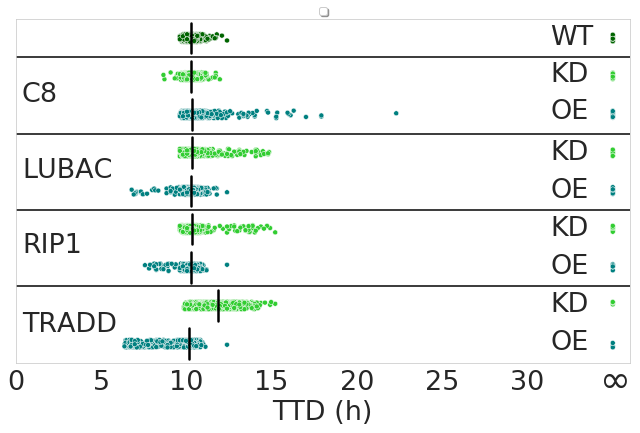

In [39]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,6))
my_pal = {"WT": "darkgreen",
          "C8 KD": "limegreen", "C8 OE":"teal",
          "LUBAC KD": "limegreen", "LUBAC OE":"teal",
          "RIP1 KD":"limegreen", "RIP1 OE":"teal",
         "TRADD KD": "limegreen", "TRADD OE":"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode3hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor ='white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
#            meanprops=meanpointprops,
# boxprops = dict(linestyle='*', linewidth=30, color='k')
b = sns.boxplot(showmeans=False,
            meanline=False,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode3hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('WT', xy = (0.87,.925), xycoords ='axes fraction', fontsize = 27)#(-0.2,.7)
plt.annotate('KD', xy = (0.87,.817), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.87,.709), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.87,.59), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)

plt.annotate('OE', xy = (0.87,.48), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.87,.37), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('OE', xy = (0.87,.26), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('KD', xy = (0.87,.15), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('OE', xy = (0.87,.04), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)

plt.annotate('C8', xy = (0.01,.76), xycoords ='axes fraction', fontsize = 27)
plt.annotate('LUBAC', xy = (0.01,.54), xycoords ='axes fraction', fontsize = 27)
plt.annotate('RIP1', xy = (0.01,.32), xycoords ='axes fraction', fontsize = 27)
plt.annotate('TRADD', xy = (0.01,.09), xycoords ='axes fraction', fontsize = 27)

plt.annotate(r'$\infty$', xy = (0.95,-0.08), xycoords ='axes fraction', fontsize = 37)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 27)
b.set_ylabel("")
b.tick_params(labelsize=27)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25, 30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.set_xlabel("TTD (h)",fontsize = 27)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode4_initsens_100tnf_stripdots_hrs_kdoeinside_testingmedian.pdf')

In [27]:
dfmode4hr = pd.read_csv("mode4_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


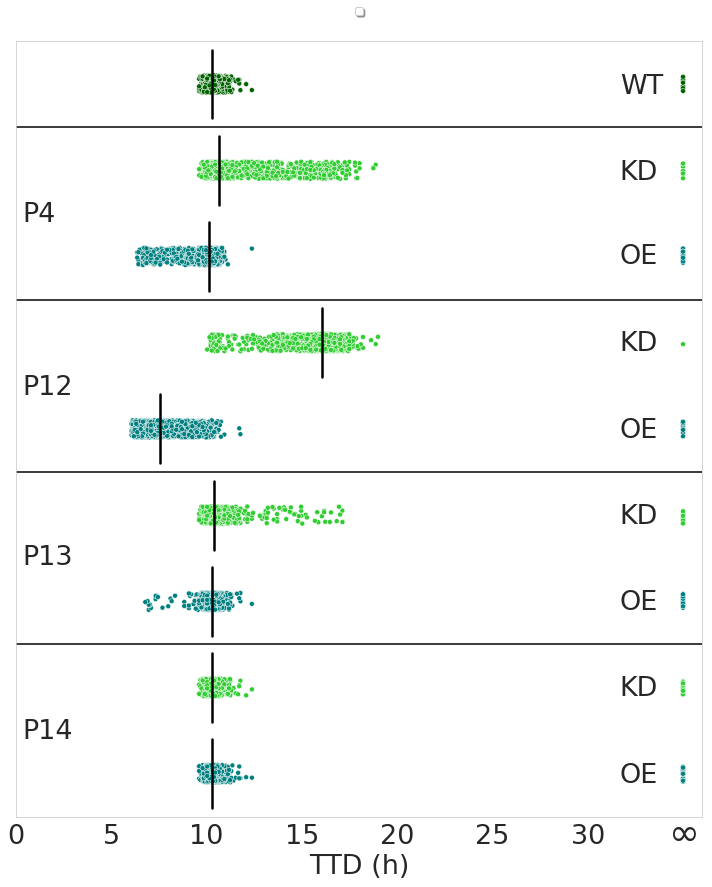

In [45]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (10,12))
my_pal = {"WT": "darkgreen",
          'P4 KD': "limegreen",'P4 OE':"teal", 
          'P12 KD': "limegreen", 'P12 OE':"teal",
          'P13 KD': "limegreen",'P13 OE':"teal",
         'P14 KD': "limegreen",'P14 OE':"teal"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode4hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor="white")
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
#            meanprops=meanpointprops,
# boxprops = dict(linestyle='*', linewidth=30, color='k')
b = sns.boxplot(showmeans=False,
            meanline=False,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode4hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
# for median in b['medians']:
#     median.set(color='k', linewidth=1.5,)
#     x,y = median.get_data()
#     xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
#     plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)
plt.annotate('WT', xy = (0.88,.932), xycoords ='axes fraction', fontsize = 27)#(-0.2,.7)
plt.annotate('KD', xy = (0.88,.821), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('OE', xy = (0.88,.712), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('KD', xy = (0.88,.6), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('OE', xy = (0.88,.488), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)

plt.annotate('KD', xy = (0.88,.377), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('OE', xy = (0.88,.267), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)

plt.annotate('KD', xy = (0.88,.156), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.0435), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
# plt.annotate('P4', xy = (-.05,.86), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P4', xy = (0.01,.7665), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('P12', xy = (0.01,.544), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
# plt.annotate('P5', xy = (-0.05,.57), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('P14', xy = (-0.05,.458), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P13', xy = (0.01,.325), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
# plt.annotate('P13', xy = (-0.07,.253), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
# plt.annotate('P12', xy = (-0.07,.19), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P14', xy = (0.01,.09975), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)

plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 37)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '','', ''])
b.set_xlabel("")
plt.xticks(fontsize = 27)
b.set_ylabel("")
b.tick_params(labelsize=27)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.set_xlabel("TTD (h)",fontsize = 27)
plt.tight_layout()

# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode4_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_testingmedian.pdf')

In [32]:
print(ttdm2wt2.count(35))
print(ttdm2lubkd2.count(35))
print(ttdm2luboe22.count(35))
print(ttdm2r1kd2.count(35))
print(ttdm2r1oe2.count(35))
print(ttdm2r3kd2.count(235))
print(ttdm2r3oe2.count(35))
print(ttdm2traddkd2.count(35))
print(ttdm2traddoe2.count(35))

12
13
13
9
8
0
16
4
3
